In [24]:
import pandas as pd
import numpy as np
from pyod.models.mcd import MCD
import matplotlib.pyplot as plt
%run Data_manipulation.ipynb

In [30]:


def detect_anomalies(df):
    # Assuming 'Date' is in datetime format and set as index
    #df['Date'] = pd.to_datetime(df['Date'])
    #df.set_index('Date', inplace=True)

    # Selecting the 'Close' column for anomaly detection
    data = df[['Close']].values

    # Initialize the Fast-MCD model
    mcd = MCD()

    # Fit the model
    mcd.fit(data)

    # Predict the anomaly scores
    anomaly_scores = mcd.decision_function(data)

    # Determine a threshold for anomalies (adjust as needed)
    anomaly_threshold = np.percentile(anomaly_scores, 97)  # Example: 95th percentile

    # Identify anomalies based on threshold
    anomalies = df[anomaly_scores > anomaly_threshold]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies



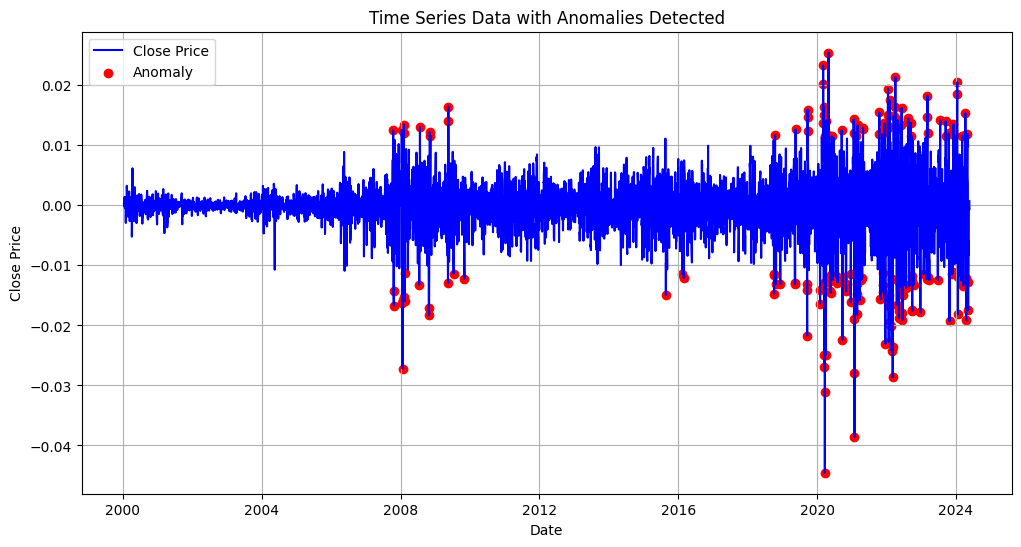

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2007-10-15,0.012474,0.002607,0.009102,0.007995,0.005813
2007-10-19,-0.014208,-0.006148,-0.009943,-0.012510,0.006926
2007-10-22,-0.016700,-0.014774,-0.017874,-0.015148,-0.021636
2008-01-14,0.012607,0.008830,0.007894,0.015781,-0.020210
2008-01-21,-0.016327,0.002942,-0.001258,-0.020370,0.042537
...,...,...,...,...,...
2024-04-18,-0.019155,-0.009540,-0.008753,-0.016370,0.079989
2024-04-19,-0.012450,-0.025509,-0.015638,-0.024842,0.025140
2024-05-02,0.011890,0.006709,0.008808,0.012794,0.064044


In [31]:
# Detecting anomaly
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data, period=14)

# Detect anomalies
anomalies = detect_anomalies(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

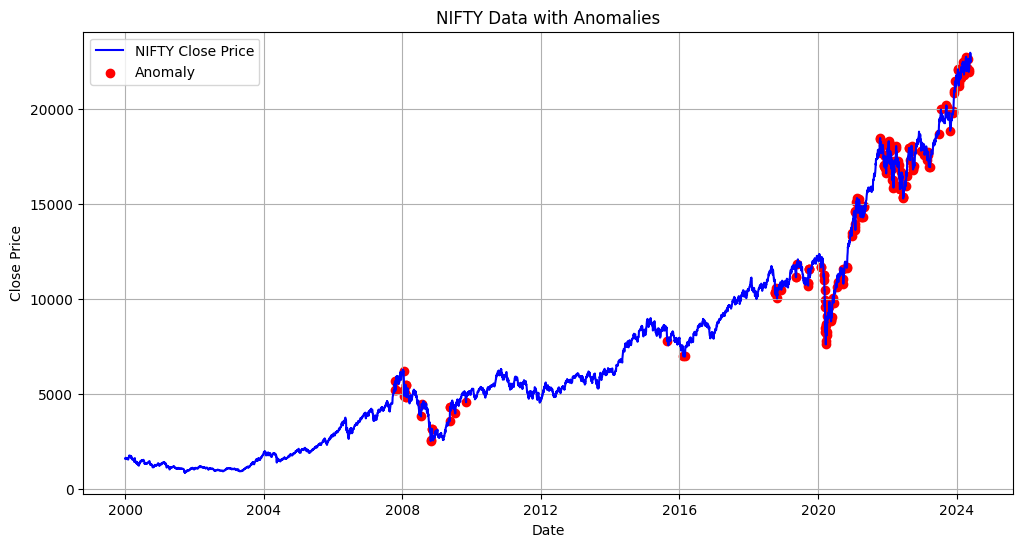

In [32]:
import matplotlib.pyplot as plt

# Example function to plot NIFTY data with anomalies marked

def plot_nifty_with_anomalies(nifty_df, anomalies_df):
    # Assuming 'Date' is in datetime format and set as index for both dataframes
    nifty_df.set_index('Date', inplace=True)
    #anomalies_df.set_index('Date', inplace=True)

    # Plot NIFTY data
    plt.figure(figsize=(12, 6))
    plt.plot(nifty_df.index, nifty_df['Close'], label='NIFTY Close Price', color='blue')
    
    # Mark anomalies
    plt.scatter(anomalies_df.index, nifty_df.loc[anomalies_df.index]['Close'], color='red', label='Anomaly')
    
    # Plot settings
    plt.title('NIFTY Data with Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

a = plot_nifty_with_anomalies(NIFTY, anomalies)